Motion Extraction & Mode Identification
This notebook shows how to extract image-space modal observations from a video of a Flower.

In [1]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import cv2
import vvt
fps = 30

In [2]:
"""
Set the options of this run.
"""
# Set the video name to determine which video to work with in this run.
video = 'goodflower'
# assert video in videos

N_THREADS = 8  # num. threads to use in multithreaded functions

## 1. Motion Extraction

Reading AVI: ../Lukas Kanade + Simulation/tmp/goodflower.mp4


Reading frames: 100%|██████████| 150/150 [00:00<00:00, 951.60it/s]


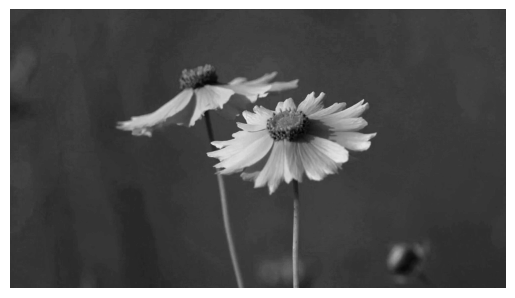

In [ ]:
"""
Read the frames and show the first frame of the video.
"""
avi_fn = '../Lukas Kanade + Simulation/tmp/goodflower.mp4'
print('Reading AVI:', avi_fn)

frames = vvt.motion.read_frames(avi_fn)
plt.imshow(frames[0], cmap='gray')
plt.axis('off')
plt.show()

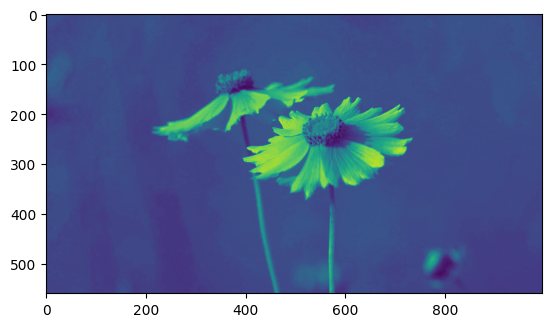

In [5]:
# uncomment for videos captured on our camera
# frames = [cv2.resize(frame, (frames[0].shape[1]//3, frames[0].shape[0] // 3)) for frame in frames]
# frames = [cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE) for frame in frames]
# %matplotlib
plt.imshow(frames[0])

In [6]:
"""
Run motion extraction and then apply amplitude-weighted Gaussian smoothing to the 
displacement fields.
"""
# Some videos have large motion at the beginning, so we have to start from a later frame.
start_frames = {
    'youtubebridge': 100,
    'tree-and-clouds': 100,
    'tree2': 100,
    'wire-and-tree' : 50,
    'resonance-test' : 750, 
    'trimn' : 0,
    'goodflower' : 0,
    'man':0
}
end_frames = {
    'youtubebridge' : 1500,
    'tree-and-clouds' : 1200,
    'tree2' : 1200,
    'wire-and-tree' : 700,
    'resonance-test':3150 , 
    'trimn' : 900,
    'goodflower' : 150,
    'man':212

 }

t_start, t_end = start_frames[video], end_frames[video]
ref_frame = frames[t_start]
motion_fields = vvt.motion.extract_motion(
    frames[t_start:t_end], ref_frame, filter_pct=99, n_threads=N_THREADS)
motion_fields = vvt.motion.weighted_gaussian_smooth(
    motion_fields, ref_frame, sigma=4, n_threads=N_THREADS)

Running motion extraction in 8 threads...
Done! Elapsed time: 0:00:14.960612
Running amplitude-weighted Gaussian smoothing in 8 threads...
Done! Elapsed time: 0:00:02.087745


In [7]:
motion_fields.shape

(2, 150, 560, 996)

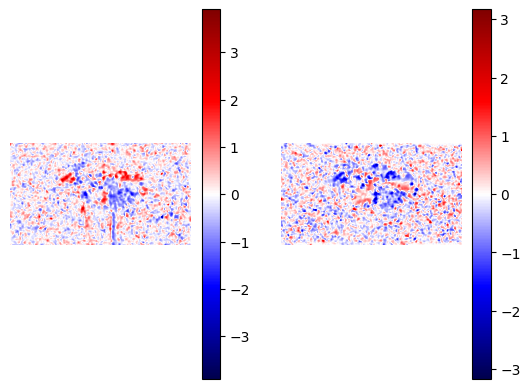

In [8]:
"""
View the displacement field at one frame.
"""
t = 60

# Create a figure with a specific size
# plt.figure(figsize=(10, 10))

# First subplot
plt.subplot(121)
vvt.vis.plot_motion_field(motion_fields[0][t])

# Second subplot
plt.subplot(122)
vvt.vis.plot_motion_field(motion_fields[1][t])

# Show the plot
plt.show()

## 2. Mode Identification

In [9]:
"""
Run 1D FFT on displacement fields.
`fft_dx[i]` contains the FFT coefficients of horizontal motion at FFT bin i.
`fft_dy[i]` contains the FFT coefficients of vertical motion at FFT bin i.
`spectrum` is the power spectrum of horizontal + vertical motion amplitude.
`ffreqs[i]` is the frequency [Hz] of FFT bin i.
"""
max_fft_freq = 30  # max. frequency (in Hz) to consider
fft_dx, fft_dy, spectrum, ffreqs = vvt.modes.get_fft_results(
    motion_fields, fps, max_fft_freq, n_threads=N_THREADS)
log_spectrum = np.log(spectrum)

Running FFT in 8 threads...
[Thread 0] 5 / 70 rows processed in 1.0 seconds.
[Thread 0] 10 / 70 rows processed in 1.0 seconds.
[Thread 0] 15 / 70 rows processed in 0.9 seconds.
[Thread 0] 20 / 70 rows processed in 1.0 seconds.
[Thread 0] 25 / 70 rows processed in 1.0 seconds.
[Thread 0] 30 / 70 rows processed in 1.0 seconds.
[Thread 0] 35 / 70 rows processed in 0.9 seconds.
[Thread 0] 40 / 70 rows processed in 0.9 seconds.
[Thread 0] 45 / 70 rows processed in 1.0 seconds.
[Thread 0] 50 / 70 rows processed in 1.0 seconds.
[Thread 0] 55 / 70 rows processed in 1.1 seconds.
[Thread 0] 60 / 70 rows processed in 1.1 seconds.
[Thread 0] 65 / 70 rows processed in 1.1 seconds.
[Thread 0] 70 / 70 rows processed in 0.9 seconds.
Done! Elapsed time: 0:00:14.388385


In [10]:
spectrum

array([2.85467148e+08, 3.00934159e+08, 1.45510164e+08, 1.16292333e+08,
       9.94433403e+07, 1.13081802e+08, 8.17568187e+07, 8.47443693e+07,
       7.41424870e+07, 1.20456657e+08, 1.42407246e+08, 9.68955160e+07,
       6.30830650e+07, 6.11675370e+07, 4.78288192e+07, 4.95386310e+07,
       4.07553095e+07, 3.90578204e+07, 5.05286065e+07, 6.64822978e+07,
       4.89103551e+07, 3.89093894e+07, 3.46230426e+07, 4.30243955e+07,
       2.29351196e+07, 2.32348715e+07, 3.49707695e+07, 3.41865611e+07,
       2.34689970e+07, 2.82522691e+07, 3.06530823e+07, 2.16855755e+07,
       2.08943490e+07, 2.05521377e+07, 1.66847004e+07, 1.63619243e+07,
       1.68786118e+07, 1.68788978e+07, 1.97641270e+07, 2.04950564e+07,
       1.79221600e+07, 1.56059277e+07, 1.71759766e+07, 1.51290867e+07,
       1.34473142e+07, 1.46092998e+07, 1.41242224e+07, 1.62090036e+07,
       1.40665877e+07, 1.34819507e+07, 1.37494250e+07, 1.30564028e+07,
       1.36795571e+07, 1.25340411e+07, 1.27519834e+07, 1.18679152e+07,
      

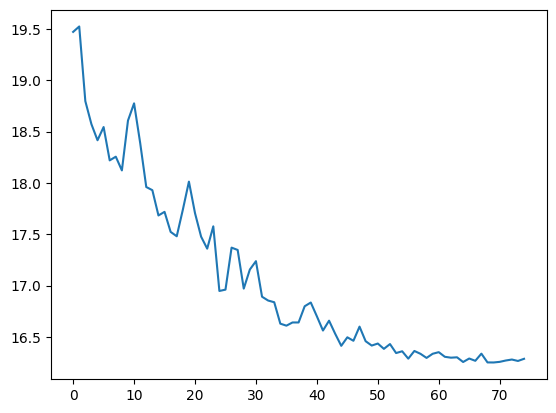

In [11]:
# %matplotlib notebook
plt.plot(np.arange(len(log_spectrum)), log_spectrum)

In [12]:
fft_dx.dtype

dtype('complex128')

In [13]:
ffreqs[5]

1.0

In [14]:
def read_file_and_extract_data(file_path):
    with open(file_path, 'r') as file:
        # Read the first three lines
        height = int(file.readline().strip())
        width = int(file.readline().strip())
        num_points = int(file.readline().strip())
        
        # Read the specified number of points
        data = []
        for _ in range(num_points):
            line = file.readline().strip()
            x, y = map(int, line.split(','))
            data.append((x, y))

    return height, width, num_points, data

In [26]:
file_path = '../Lukas Kanade + Simulation/tmp/goodflower-fp.txt'
height, width, num_points, data_points = read_file_and_extract_data(file_path)

In [27]:
data_points=np.asarray(data_points)

In [28]:
data_points[:,0]

array([475, 450, 709, 468, 395, 422, 403, 531, 717, 431, 608, 455, 493,
       421, 734, 719, 500, 706, 389, 408, 517, 659, 632, 498, 517, 533,
       585, 549, 612, 425, 559, 674, 549, 459, 360, 519, 547, 491, 525,
       431, 522, 593, 569, 530, 474, 372, 559, 411, 545, 488, 564, 585,
       573, 628, 412, 673, 538, 551, 336, 589, 706, 243, 647, 368, 668,
       674, 717, 556, 463, 569, 611, 641, 576, 665, 549, 715, 242, 578,
       387, 620, 423, 569, 654, 575, 573, 655, 414, 549, 215, 620, 571,
       378, 485, 391, 311, 225, 354, 516, 644, 266, 282, 603, 677, 401,
       699, 343, 627, 353, 474, 563, 452, 565, 636, 439, 390, 344, 363,
       398, 622, 538, 578, 630, 382, 538, 476, 655, 590, 574, 355, 565,
       368, 411, 618, 399, 347, 580, 711, 274, 523, 471, 595, 658, 640,
       532, 466, 602, 502, 568, 571, 551, 439, 572, 490, 647, 333, 579,
       477, 681, 367, 567, 573, 589, 292, 509, 600, 574, 512, 375, 535,
       686, 588, 400, 723, 552, 650, 473, 597, 256, 656, 345, 54

In [29]:
data_points[:,1]

array([229, 259, 182, 243, 289, 306, 268, 203, 189, 319, 167, 228, 209,
       280, 249, 264, 196, 192, 213, 315, 169, 188, 170, 177, 229, 259,
       206, 186, 179, 198, 203, 188, 252, 211, 235, 240, 205, 357, 219,
       276, 371, 213, 341, 249, 203, 225, 349, 330, 241, 200, 178, 234,
       206, 198, 275, 278, 188, 262, 230, 223, 217, 245, 328, 161, 310,
       198, 231, 242, 334, 248, 258, 241, 143, 320, 215, 282, 222, 270,
       118, 343, 329, 481, 265, 235, 417, 254, 201, 344, 236, 173, 401,
       132, 186, 154, 224, 229, 149, 347, 251, 247, 252, 342, 304, 113,
       245, 142, 185, 121, 319, 265, 168, 235, 333, 148, 133, 158, 123,
       126, 222, 211, 216, 228, 147, 228, 143, 319, 325, 154, 139, 212,
       135, 298, 191, 202, 229, 345, 201, 237, 154, 219, 175, 329, 261,
       130, 147, 269, 325, 498, 391, 229, 182, 429, 336, 192, 208, 193,
       175, 293, 149, 196, 556, 248, 231, 176, 229, 468, 130, 118, 238,
       217, 269, 190, 253, 272, 307, 338, 199, 253, 204, 131, 33

In [30]:
fft_dy.shape

(75, 560, 996)

In [31]:

def save_fft_python(fft_dx_real, fft_dx_imag, fft_dy_real, fft_dy_imag, freqs):
    # Remove the last frequency and corresponding data
    freqs = freqs[:-1]
    # fft_dx_real = fft_dx_real[:-1]
    # fft_dx_imag = fft_dx_imag[:-1]
    # fft_dy_real = fft_dy_real[:-1]
    # fft_dy_imag = fft_dy_imag[:-1]

    # Create output file
    output_name = f"goodflower-fft.txt"
    
    with open(output_name, "w") as fs:
        n_freqs = len(freqs)
        n_features = fft_dx_real.shape[1]
        
        # Write number of frequencies and features
        fs.write(f"{n_freqs}\n")
        fs.write(f"{n_features}\n")
        
        # Calculate magnitudes and write them along with frequencies
        for i in range(n_freqs):
            x_mags = np.sqrt(fft_dx_real[i]**2 + fft_dx_imag[i]**2)
            y_mags = np.sqrt(fft_dy_real[i]**2 + fft_dy_imag[i]**2)
            x_mag_sum = np.sum(x_mags)
            y_mag_sum = np.sum(y_mags)
            fs.write(f"{freqs[i]},{x_mag_sum},{y_mag_sum}\n")
        
        # Helper function to write matrix data
        def write_cv_mat(mat):
            for row in mat:
                fs.write(",".join(map(str, row)) + "\n")
        
        # Write matrix data
        write_cv_mat(fft_dx_real)
        write_cv_mat(fft_dx_imag)
        write_cv_mat(fft_dy_real)
        write_cv_mat(fft_dy_imag)

    print(f"File saved as {output_name}")

# Example usage:
# Assuming fft_dx_real, fft_dx_imag, fft_dy_real, fft_dy_imag, and freqs are numpy arrays
# Call save_fft_python with appropriate data


In [32]:
idxs=np.arange(75)
print(idxs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]


In [33]:
image_space_modes_dx, image_space_modes_dy = vvt.modes.gather_image_space_modes(
    fft_dx, fft_dy, idxs, is_complex=True)
image_space_modes_freqs = ffreqs[idxs]

In [34]:
save_fft_python(np.real(image_space_modes_dx[:,data_points[:,1],data_points[:,0]]), np.imag(image_space_modes_dx[:,data_points[:,1],data_points[:,0]]), np.real(image_space_modes_dy[:,data_points[:,1],data_points[:,0]]), np.imag(image_space_modes_dy[:,data_points[:,1],data_points[:,0]]), ffreqs)

File saved as goodflower-fft.txt


In [35]:
fft_dx[:,62,290]

array([-2.83563925e+00 +0.j        ,  8.11113830e+00+13.25094807j,
       -5.10134380e+00 +6.90022102j,  3.23812973e+00 +2.95301432j,
       -2.75827407e+00 -5.51738334j, -6.60938870e-01 +6.41150374j,
        3.04939696e+00 +3.51321821j,  8.09513014e+00 +6.5484088j ,
       -2.55160734e+00 +1.88614425j, -3.06122777e+00 +6.42565724j,
       -4.17233813e+00 +2.76248552j, -4.67874255e+00 -1.87345672j,
       -4.34810333e+00 -3.71689653j, -3.59099891e+00 -4.74333068j,
       -2.52117840e+00 +1.12625438j,  7.71766088e-01 -4.13699973j,
        7.10252296e+00 -2.11955505j,  3.95257453e+00 +0.30239082j,
        5.02139952e+00 +3.85157612j,  1.44331291e+00 +1.41797725j,
        2.17228338e-01 +5.36041697j, -4.70391849e-01 -1.86059847j,
       -3.57175040e-01 +0.29294893j,  9.27588791e-02 +1.71126512j,
       -3.16097212e+00 +2.50217672j, -5.28384332e-01 +0.17637236j,
        2.91291553e+00 +1.17752007j,  7.09315535e-01 -1.11410683j,
       -3.16519955e+00 -2.13896426j,  3.27671195e+00 +0.153958

In [36]:
fft_dx[:,data_points[:,1],data_points[:,0]].shape

(75, 216)

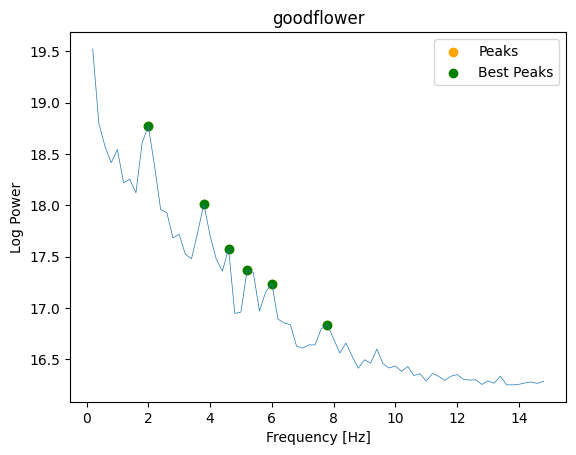

In [49]:
"""
Find peaks in the log-power spectrum of motion amplitude.
`best_peak_idxs_per_video` contains the best peaks that were
selected qualitatively.
"""
best_peak_idxs_per_video = {
    'top_front_pluck': [21, 25, 59],  # FFT bin indices
    'top_right_pluck': [25, 32, 60, 99],
    'left_side_twist': [25, 31, 65],
    'youtubebridge' : [36,66,96,129], #,210,308]
    'tree-and-clouds' : [92,126,227], #[18,40,64,92]
    'tree2' : [5,15,29,58],
    'resonance-test' : [320, 640, 961, 1120], #[220,440,661]
    'trimn' : [40,41,43,52,58,70,83,95,97,109,135],
    'goodflower': [10,19,23,26,30,39]
    
}
max_fft_idx = vvt.utils.find_nearest(ffreqs, max_fft_freq)
peak_idxs = vvt.modes.find_peak_idxs(log_spectrum[:max_fft_idx], prominence=0.01)
best_peak_idxs = best_peak_idxs_per_video[video]

plt.plot(ffreqs[1:max_fft_idx], log_spectrum[1:max_fft_idx], linewidth=0.5)
plt.scatter(
    ffreqs[peak_idxs], log_spectrum[peak_idxs], color='orange',
    label='Peaks')
plt.scatter(
    ffreqs[best_peak_idxs], log_spectrum[best_peak_idxs], color='green',
    label='Best Peaks')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Power')
plt.title(video)
plt.show()

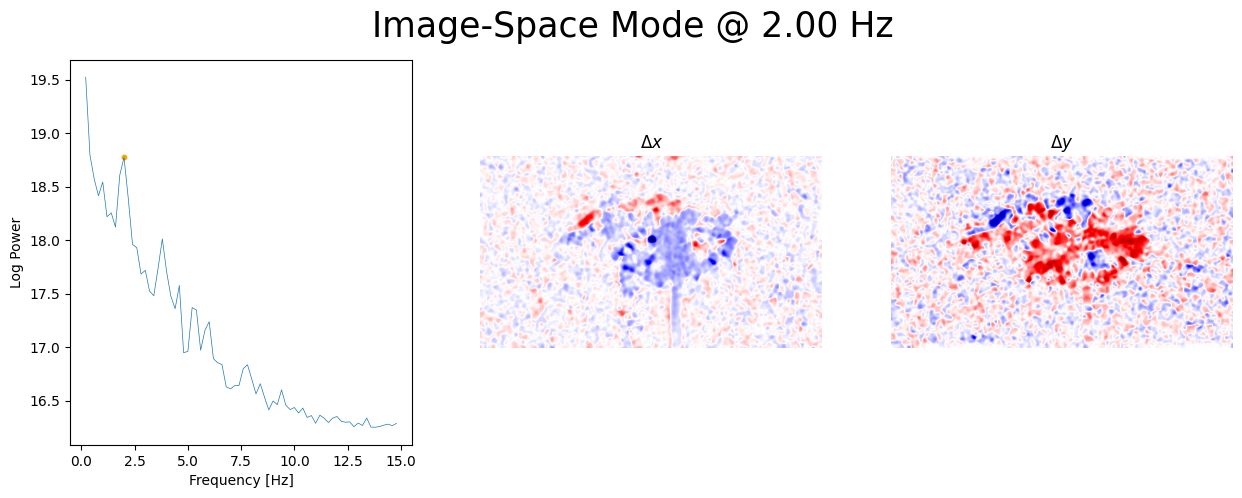

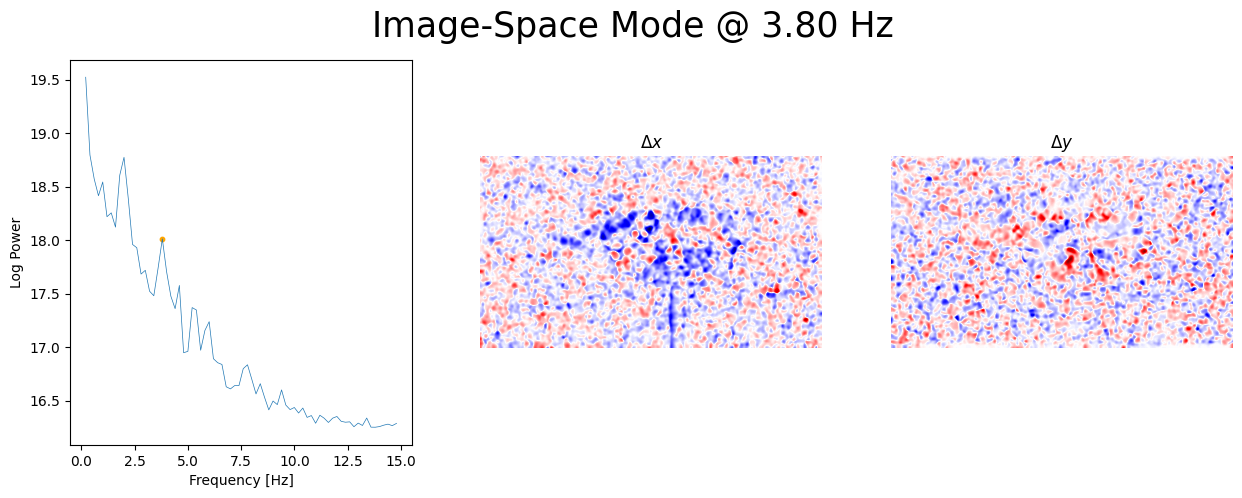

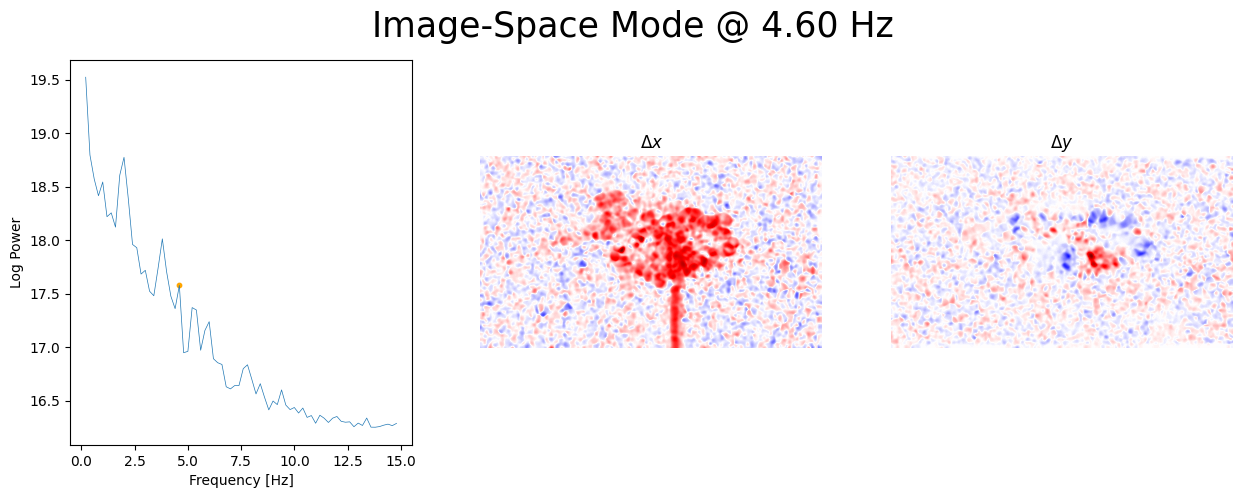

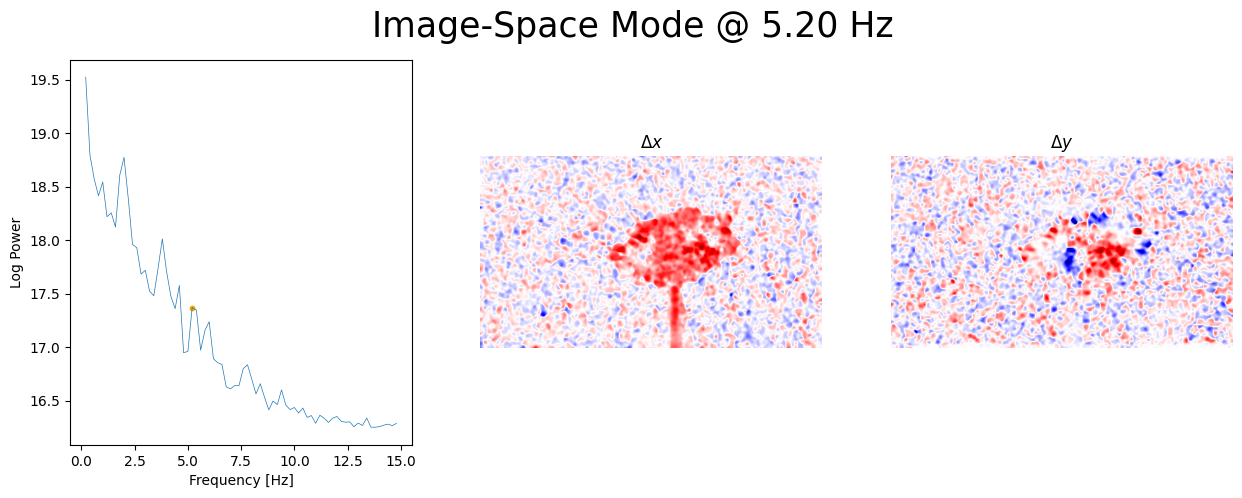

In [50]:
"""
View a specified image-space mode.
"""
%matplotlib inline
fft_idx = best_peak_idxs[0]

mode_shape_dx = fft_dx[fft_idx].real
mode_shape_dy = fft_dy[fft_idx].real
mode_freq = ffreqs[fft_idx]

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Image-Space Mode @ %.2f Hz' % mode_freq, fontsize=25)

plt.subplot(131)
plt.plot(ffreqs[1:max_fft_idx], log_spectrum[1:max_fft_idx], linewidth=0.5)
plt.scatter(ffreqs[fft_idx], log_spectrum[fft_idx], c='orange', s=10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Power')

plt.subplot(132)
vvt.vis.plot_motion_field(mode_shape_dx, cbar=False)
plt.title('$\Delta x$')
plt.axis('off')

plt.subplot(133)
vvt.vis.plot_motion_field(mode_shape_dy, cbar=False)
plt.title('$\Delta y$')
plt.axis('off')
plt.show()

fft_idx = best_peak_idxs[1]

mode_shape_dx = fft_dx[fft_idx].real
mode_shape_dy = fft_dy[fft_idx].real
mode_freq = ffreqs[fft_idx]

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Image-Space Mode @ %.2f Hz' % mode_freq, fontsize=25)

plt.subplot(131)
plt.plot(ffreqs[1:max_fft_idx], log_spectrum[1:max_fft_idx], linewidth=0.5)
plt.scatter(ffreqs[fft_idx], log_spectrum[fft_idx], c='orange', s=10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Power')

plt.subplot(132)
vvt.vis.plot_motion_field(mode_shape_dx, cbar=False)
plt.title('$\Delta x$')
plt.axis('off')

plt.subplot(133)
vvt.vis.plot_motion_field(mode_shape_dy, cbar=False)
plt.title('$\Delta y$')
plt.axis('off')
plt.show()

fft_idx = best_peak_idxs[2]

mode_shape_dx = fft_dx[fft_idx].real
mode_shape_dy = fft_dy[fft_idx].real
mode_freq = ffreqs[fft_idx]

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Image-Space Mode @ %.2f Hz' % mode_freq, fontsize=25)

plt.subplot(131)
plt.plot(ffreqs[1:max_fft_idx], log_spectrum[1:max_fft_idx], linewidth=0.5)
plt.scatter(ffreqs[fft_idx], log_spectrum[fft_idx], c='orange', s=10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Power')

plt.subplot(132)
vvt.vis.plot_motion_field(mode_shape_dx, cbar=False)
plt.title('$\Delta x$')
plt.axis('off')

plt.subplot(133)
vvt.vis.plot_motion_field(mode_shape_dy, cbar=False)
plt.title('$\Delta y$')
plt.axis('off')
plt.show()


fft_idx = best_peak_idxs[3]

mode_shape_dx = fft_dx[fft_idx].real
mode_shape_dy = fft_dy[fft_idx].real
mode_freq = ffreqs[fft_idx]

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Image-Space Mode @ %.2f Hz' % mode_freq, fontsize=25)

plt.subplot(131)
plt.plot(ffreqs[1:max_fft_idx], log_spectrum[1:max_fft_idx], linewidth=0.5)
plt.scatter(ffreqs[fft_idx], log_spectrum[fft_idx], c='orange', s=10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Power')

plt.subplot(132)
vvt.vis.plot_motion_field(mode_shape_dx, cbar=False)
plt.title('$\Delta x$')
plt.axis('off')

plt.subplot(133)
vvt.vis.plot_motion_field(mode_shape_dy, cbar=False)
plt.title('$\Delta y$')
plt.axis('off')
plt.show()

In [51]:
ffreqs[best_peak_idxs]

array([2. , 3.8, 4.6, 5.2, 6. , 7.8])

In [52]:
image_space_modes_dx.shape

(75, 560, 996)